In [25]:
import seaborn as sns
import numpy as np

####  Lecture du fichier

In [26]:
### Le fichier des stats : 
titanic = sns.load_dataset('titanic')
titanic['age'] = np.round(titanic['age'] )

<AxesSubplot:xlabel='sex', ylabel='age'>

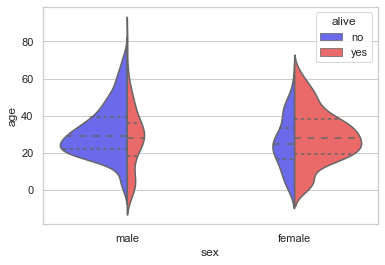

In [27]:
sns.set_theme(style="whitegrid")


sns.violinplot(y="age", hue="alive", x = 'sex',
              data=titanic,
              scale='count',
               split=True,
              palette='seismic',
              inner='quartile')


On voit que la distribution des femmes est importante parmi les personnes vivantes

In [24]:
import pandas as pd


tabletitanic = pd.pivot_table(titanic, values='survived', index=['age','sex'], columns='alive',
                    aggfunc=np.ma.count,fill_value=0)
tabletitanic =  tabletitanic.groupby(["sex","age"]).agg({'survived': [np.count, np.sum]}).to_frame()
#tabletitanic = titanic.groupby(["sex","age"])['survived'].count().rename('Total')['survived'].sum().rename('survived').to_frame() 
def CalculPxMethode(df=tabletitanic):
    df['Lx'] = df['no']+df['yes']
    df['Lx1'] = df['yes'] 
        # Selon la definition de Px
    df['Px'] = df['Lx1']/df['Lx'] 
    df['Qx'] = (1-df['Lx1']/df['Lx']) 
#CalculPxMethode3(df=tabletitanic)
#CalculPxMethode(df=tabletitanic)
display(tabletitanic)

display(tabletitanic.columns)
#df.expanding(..., method='table') pour travailler avec plusieurs variables

AttributeError: module 'numpy' has no attribute 'count'

[[ 0.          4.          4.          4.          1.          0.        ]
 [ 2.          7.          9.          7.          0.77777778  0.22222222]
 [ 4.          2.          6.          2.          0.33333333  0.66666667]
 [ 3.          1.          4.          1.          0.25        0.75      ]
 [ 1.          1.          2.          1.          0.5         0.5       ]
 [ 0.          4.          4.          4.          1.          0.        ]
 [ 0.          5.          5.          5.          1.          0.        ]
 [ 3.          2.          5.          2.          0.4         0.6       ]
 [ 0.          4.          4.          4.          1.          0.        ]
 [ 1.          1.          2.          1.          0.5         0.5       ]
 [ 0.          1.          1.          1.          1.          0.        ]
 [ 0.          1.          1.          1.          1.          0.        ]
 [ 2.          0.          2.          0.          0.          1.        ]
 [ 1.          1.        

TypeError: tuple indices must be integers or slices, not tuple

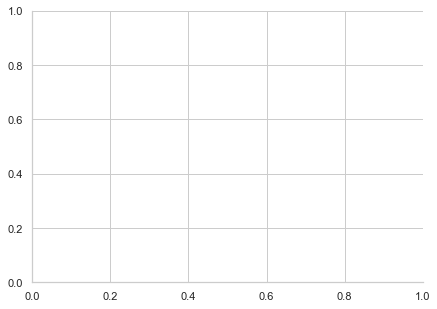

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
tabletitanic.reset_index
Table = tabletitanic.loc[1:].to_numpy() 
print(Table)
Table = np.where(Table[:,2]==1)  #homme
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
x = Table[:,1] # Age
hue = Table[:,2] # Sex
y = Table[:,8]  # Qx

sns.scatterplot(x=x, y=y,
                hue=hue,  
                palette="ch:r=-.2,d=.3_r" ,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
 
  
xnew = np.linspace(x.min(), x.max(), 10)
  
gfg = make_interp_spline(x, y, k=2)
  
y_new = gfg(xnew)
  
plt.plot(xnew, y_new)
  
plt.show()

In [ ]:
#define a moving average function
def moving_average(x,y,step_size=.1,bin_size=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        items_in_bin = y[(x>(bin_center-bin_size*0.5) ) & (x<(bin_center+bin_size*0.5))]
        bin_avg[index] = np.mean(items_in_bin)

    return bin_centers,bin_avg

#plot the moving average
bins, average = moving_average(x,y)

In [30]:
titanic.groupby(['sex'])['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [47]:
titanic.groupby(['who'])['survived'].mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

In [32]:
from formulaic import model_matrix # permet d'utiliser des formules comme dans R
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [51]:
def CalculGLMGraph(dataEntree,formula,dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),monOffset=None,ImpressionInfluence=False,
                   VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = dataEntree.copy()
        y, X = model_matrix(formula,df) 
      
        # GLM proprement dite
        Result= sm.GLM(endog=y,exog=X,family=dist(link=Fonctionlien),offset=monOffset).fit()
        display(Result.summary())
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=df[VarY], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        df[VarPredict] = Result.predict(X,offset=monOffset)        
        #GraphiqueTaux(data=df,x1=VarXGraph,y1=VarY,y2=VarPredict,Varhue=VarXGraphCateg,titre=titre)
        return Result

In [52]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [53]:
titanic[]

SyntaxError: invalid syntax (1202515894.py, line 1)

In [67]:
ResultGLM=CalculGLMGraph(dataEntree=titanic,
         formula = 'survived ~ sex +class + age ',VarY='survived',VarXGraph='age', VarXGraphCateg='sex',ImpressionInfluence=False,VarPredict='survivedHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Binomial,Fonctionlien=sm.families.links.logit())  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.67
Date:                Mon, 21 Mar 2022   Deviance:                       647.35
Time:                        20:23:58   Pearson chi2:                     767.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7757      0.401      9.412      0.000       2.989       4.562
age                -0.0369      0.008     -4.825      0.000      -0.052      -0.022
class[T.Second]    -1.3097      0.278     -4.710      0.000      -1.855      -0.765
class[T.Third]     -2.5805      0.281     -9.167      0.000      -3.132      -2.029
sex[T.male]        -2.5227      0.207    -12.165      0.000      -2.929      -2.116
===================================================================================
"""

In [68]:
ResultGLM.summary()

formula ='survived ~ sex +class + age'

d = {'survived': [0], 'age': [15], 'deck' : ['G'], 'who':['man'], 'sex' :['male'],'sibsp':[0], 'embarked':['Q'],'class':['Third']}
dftest = pd.DataFrame(data=d)
print(dftest)
y, X = model_matrix(formula,dftest) 
print(X)
dftest['MUxhat'] = ResultGLM.predict(X)  
print(dftest)

   survived  age deck  who   sex  sibsp embarked  class
0         0   15    G  man  male      0        Q  Third
   Intercept  age
0        1.0   15


ValueError: shapes (1,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)